In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
import math


matplotlib.use('GTKAgg') 

mu, sigma = 0, 1 # mean and standard deviation

/home/daniel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/daniel/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/daniel/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/daniel/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/home/daniel/.local/lib/python2.7/

In [6]:

### Graph
def initGraph(fx,tx,fy,ty,sub):
    fig = plt.figure()
    ax = fig.add_subplot(sub)
    
    # interactive mode
#     plt.ion()

    axes = plt.gca()
    axes.set_xlim([fx,tx])
    axes.set_ylim([fy,ty])
    fig.show()
    return fig, ax            
        
def drawMolecule(molecule,fig,ax):
    ax.plot([molecule.x],[molecule.y],molecule.color+"o",markersize=1)
    fig.canvas.draw()
    
def drawMolecules(molecules,fig,ax):
    ax.plot(map(lambda m: m.x, molecules),map(lambda m: m.y, molecules),"ro",markersize=1)
    fig.canvas.draw()
    
def drawMoleculesColors(molecules,fig,ax):
    for m in molecules:
        ax.plot(m.x,m.y,m.color+"o",markersize=1)
    fig.canvas.draw()
    fig.canvas.
    
def drawMsod(molecules,fig,ax):
    for m in molecules:
        ax.plot(m.epoch,m.msod,m.color+"o",markersize=1)
    fig.canvas.draw()
    
    
    
### Calculations     
class Molecule:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.color = color
        self.epoch = 0
        self.sumSquareDistance = 0
        self.msod = 0 
        
    def __str__(self):
        return "Molecule ("+str(self.x)+","+str(self.y)+") "+str(self.color)+", epoch: "+str(self.epoch) 
        
    def move(self, coordinates):
        self.x += coordinates[0]
        self.y += coordinates[1]
        self.epoch += 1
        self.sumSquareDistance += coordinates[0]*coordinates[0] + coordinates[1]*coordinates[1]
        self.msod = meanSquareOfDisplacement(1, self.sumSquareDistance / float(self.epoch), self.epoch-1)
    
def meanSquareOfDisplacement(movementPerTimeUnit, squareDistance, time):
    return movementPerTimeUnit * squareDistance * time    
    
def randomCoordinates():
    s = np.random.normal(mu, sigma, 2)
    return s

def setInitCoordinates(amount_molecules,axis,border):
    molecules = []
    if amount_molecules == 1:
        molecules.append(Molecule(0,0,colors[0]))
        return molecules
    
    for i in range(0,amount_molecules):
        s_amount = (math.sqrt(amount_molecules))

        offset = (axis*2 - border*2) / s_amount
        x = -axis+border+offset*(i/s_amount)
        y = -axis+border+offset*(i%s_amount)
        molecules.append(Molecule(x,y,colors[i%len(colors)]))
    return molecules


### Run methods
def runAll(molecules,epochs,fig,ax):
    for i in range(0,epochs):
        for m in molecules:
            m.move(randomCoordinates())

        drawMolecules(molecules,fig,ax)
    
def runAllColors(molecules,epochs,fig,ax,relFig,relAx):
     for i in range(0,epochs):
        for m in molecules:
            m.move(randomCoordinates())
        
        drawMoleculesColors(molecules,fig,ax)
        drawMsod(molecules,relFig,relAx)

SyntaxError: invalid syntax (<ipython-input-6-787d6aeb45f2>, line 28)

In [7]:
axis = 100
epochs = 1000
amount_molecules = 3
border=40
colors = ['b','g','r','c','m','y','k','w']

<IPython.core.display.Javascript object>


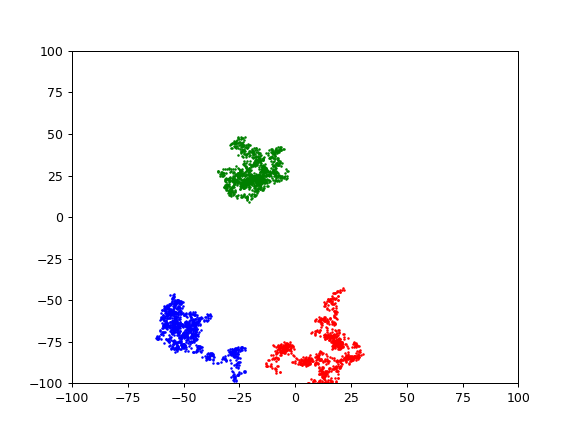

<IPython.core.display.Javascript object>


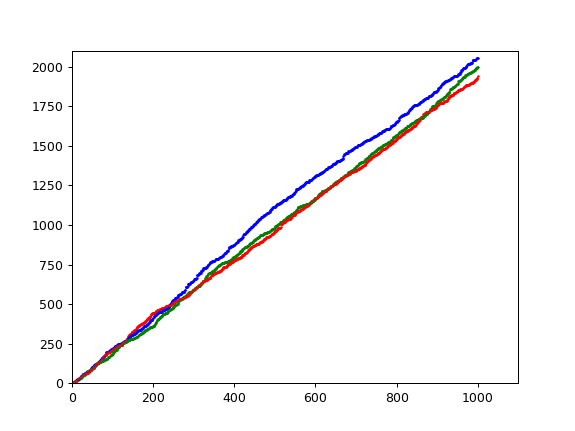

In [8]:
fig, ax = initGraph(-axis,axis,-axis,axis,111)

relFig, relAx = initGraph(0,epochs*1.1,0,epochs*2.1,111)

molecules = setInitCoordinates(amount_molecules,axis,border)
   
# runAll(molecules,epochs)
runAllColors(molecules,epochs,fig,ax,relFig,relAx)